In [75]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from ordplan import ORD
from ga import GA 
from lp import LP

In [76]:
#roll_paper = [68, 73, 75, 79, 82, 85, 88, 91, 95, 97]
orders = ORD("data/true_ordplan.csv",deadline_scope=0).get(deadline=True)
for i,width in enumerate(orders['ตัดกว้าง']):
    roll = ORD.calculate_roll(width)
    print(roll,width) 
    if(roll):
        break

None 11.6142
85 20.8268


In [77]:
ga_instance = GA(orders,roll).get()
ga_instance.run()

Generation :  1
Solution :
    cut_width  solution
0     11.6142         3
1     20.8268         3
2     22.2441         3
3     29.2913         3
4      4.9213         3
5     21.1811         3
6      7.3228         3
7     15.2756         3
8     18.0315         3
9     20.1969         3
10    25.7087         3
11    17.5197         3
12    20.0000         2
13    20.3937         3
14    15.9843         3
15    23.6220         3
16    14.9213         3
17    15.6693         3
18    16.1417         3
19    16.6142         3
20    23.2283         2
21    16.0236         3
22    18.3858         3
23    19.0945         3
24    20.3937         3
25    21.9685         3
26    22.7559         3
27    18.3858         2
28    20.5906         3
29    15.7087         3
Roll : 85
Used : -9391.3008
Waste : 9476.3008


Generation :  2
Solution :
    cut_width  solution
0     11.6142         2
1     20.8268         3
2     22.2441         3
3     29.2913         3
4      4.9213         3
5     21.1

c:\Users\opo25\anaconda3\envs\ortools\Lib\site-packages\pygad\pygad.py:286: UserWarning: The values of the 2 parameters 'init_range_low' and 'init_range_high' are equal and this might return the same value for some genes in the initial population.
  warnings.warn("The values of the 2 parameters 'init_range_low' and 'init_range_high' are equal and this might return the same value for some genes in the initial population.")
c:\Users\opo25\anaconda3\envs\ortools\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


    cut_width  solution
0     11.6142         2
1     20.8268         1
2     29.2913         1
3      4.9213         2
4      7.3228         2
5     18.0315         2
6     20.1969         1
7     17.5197         2
8     23.6220         1
9     15.6693         2
10    16.1417         1
11    16.6142         1
12    23.2283         2
13    16.0236         1
14    20.3937         2
15    22.7559         1
16    20.5906         2
17    15.7087         2
Roll : 85
Used : -1426.4178
Waste : 1511.4178


Generation :  26
Solution :
    cut_width  solution
0     11.6142         1
1     20.8268         1
2     29.2913         1
3      4.9213         2
4      7.3228         2
5     18.0315         2
6     20.1969         1
7     17.5197         2
8     23.6220         1
9     15.6693         2
10    16.1417         1
11    16.6142         1
12    23.2283         2
13    16.0236         1
14    20.3937         2
15    20.5906         1
16    15.7087         2
Roll : 85
Used : -1261.5357
Waste : 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


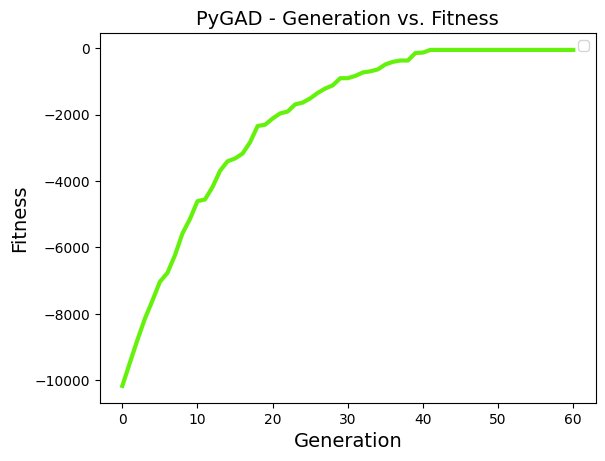

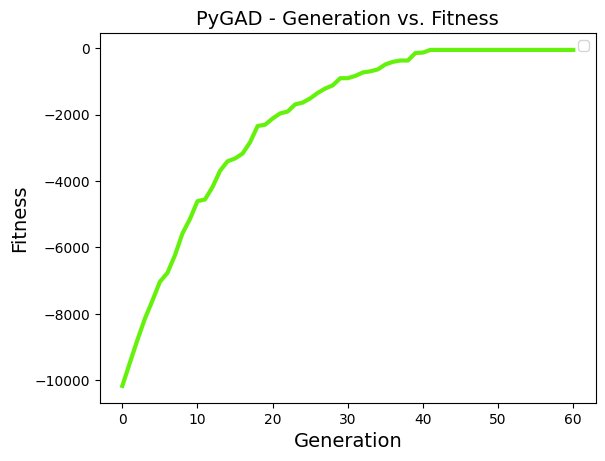

In [78]:
ga_instance.plot_fitness()

In [79]:
# lp_instance = LP(orders,10000).run()